In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.data.shape)
print()

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos.head()

(506, 13)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

22.532806324110677


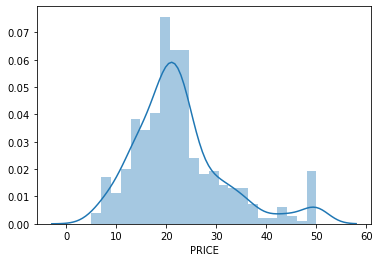

In [9]:
print(bos['PRICE'].mean())
sns.distplot(bos['PRICE'])

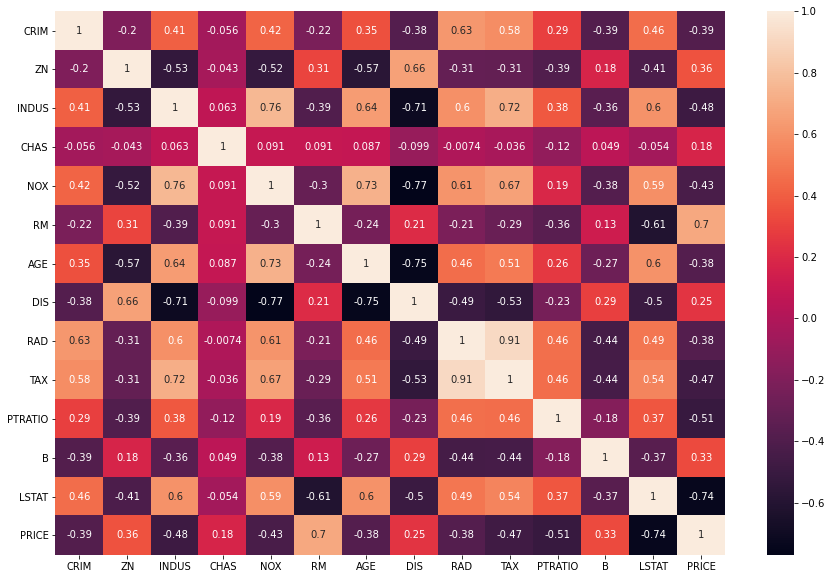

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(bos.corr(), annot=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = bos[bos.columns[:13]]
y = bos['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [20]:
price_reg = LinearRegression()
price_reg.fit(x_train, y_train)

print('Line of best fit based on linear regression:')
print(f'y = ({price_reg.coef_[0]} + {price_reg.coef_[1]})x + ({price_reg.intercept_})')

Line of best fit based on linear regression:
y = (-0.11773528930860565 + 0.04401749689522159)x + (36.93325545711896)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = price_reg.predict(x_test)
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'MSE Score: {mean_squared_error(y_test, y_pred)}')

R^2 Score: 0.6354638433202131
MSE Score: 29.78224509230235


# Standard Scaler

In [21]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_x = standard_scaler.fit_transform(x_train)
scaled_x_test = standard_scaler.transform(x_test) 
bos_reg_scaler = LinearRegression().fit(scaled_x, y_train)

In [23]:
y_pred = bos_reg_scaler.predict(scaled_x_test)
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R^2 Score: 0.6354638433202131
MSE: 29.782245092302343


# Min-Max Scalar

In [24]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaledmm_x_train = min_max_scaler.fit_transform(x_train)
scaledmm_x_test = min_max_scaler.transform(x_test) 
bos_reg_scaler_mm = LinearRegression().fit(scaledmm_x_train, y_train)

In [25]:
y_pred = bos_reg_scaler.predict(scaledmm_x_test)
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R^2 Score: 0.192481510848294
MSE: 65.9734655117006
